In [1]:
import numpy as np
import torch
from itertools import product
import matplotlib.pyplot as plt
from dataclasses import dataclass
from matplotlib.animation import FuncAnimation
import random
from enviroments import env_red, env_red_p2p, env_red_toy1, env_hubs0, env_hubs1, env_hubs2
import pickle
from algorithms.Action_Gen import Action_generation
from algorithms.RDQL import action_space_generation, ini_action_list, caculate_op_cost,update_action_space
from algorithms.DQL import DQL_algorithm, select_action
from algorithms.QL_LowRank import select_action as select_action_LR



NUMERO_DE_NUCLEOS = 16

torch.set_num_threads(NUMERO_DE_NUCLEOS)


In [2]:
env = env_hubs2(model="Exp", T=1000)
s, _ = env.set_initial(s = [0]*env.I)


In [3]:
s_t = []
r_t = []

In [5]:
max_steps = 1000
p = 1

R = 0

for step in range(max_steps):

    if p == 0:
        a = [1,1,1,1,1,0,0,0,0,0,0,0,0]
    elif p == 1:
        a = [1,1,1,1,1,1,1,1,1,1,1,1,1]
    elif p == 2:
        a = list(np.random.choice([0, 1], size=13))
            
    s_prime, r, done, _, _ = env.step(a)
    s_t.append(s_prime-s)
    r_t.append(r)
    s = s_prime
    
    R += r

    if done:
        S = s_prime
        break




<StemContainer object of 3 artists>

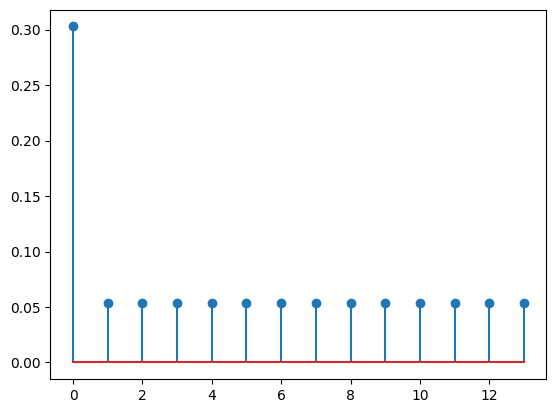

In [8]:
plt.stem(env.P_j_dist(a = [1,1,1,1,1,1,1,1,1,1,1,1,1]))

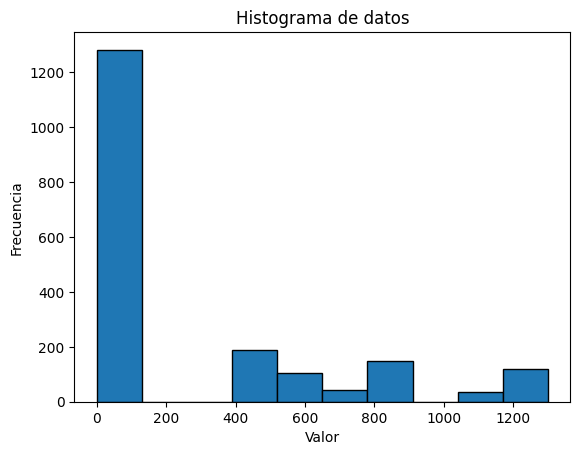

In [110]:
# Crear el histograma
plt.hist(r_t, edgecolor='black')  # Especificamos el número de bins y el color del borde
plt.title('Histograma de datos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

/home/jorejuela/Code/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1433: VisibleDeprecationWarning: Creating an ndarray from nested sequences exceeding the maximum number of dimensions of 32 is deprecated. If you mean to do this, you must specify 'dtype=object' when creating the ndarray.
  xi = np.asanyarray(xi)


ValueError: x must have 2 or fewer dimensions

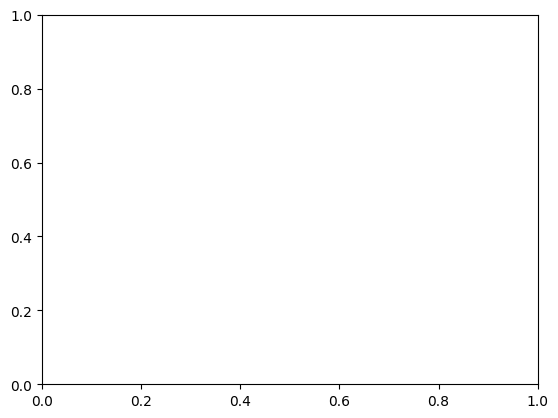

In [81]:
n_t = []
for s_i in s_t:
    
    # Filtrar los valores no deseados (por si acaso)
    bits_filtrados = [1 if bit else 0 for bit in s_i[:-1]]

    # Convertir la lista de bits a una cadena binaria como una cadena de texto
    cadena_binaria = ''.join(map(str, bits_filtrados))

    # Convertir la cadena binaria a un número entero
    numero_entero = int(cadena_binaria, 2)

    n_t.append(numero_entero)

# Crear el histograma
plt.hist(n_t, edgecolor='black')  # Especificamos el número de bins y el color del borde
plt.title('Histograma de datos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

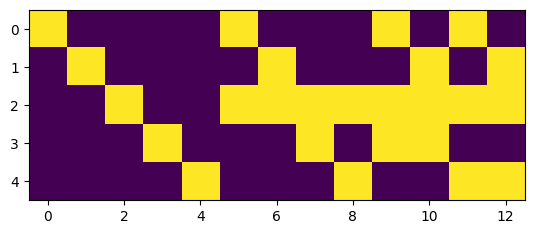

In [2]:
env = env_hubs2(model="Exp", T=3000)
plt.imshow(env.A_ij)

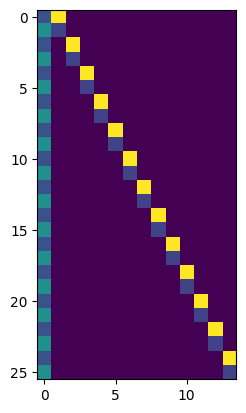

In [3]:
plt.imshow(env.v_lj)

Numero de productos 13
Acción de logitud 13 (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
LLega cliente 24
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.8]
13


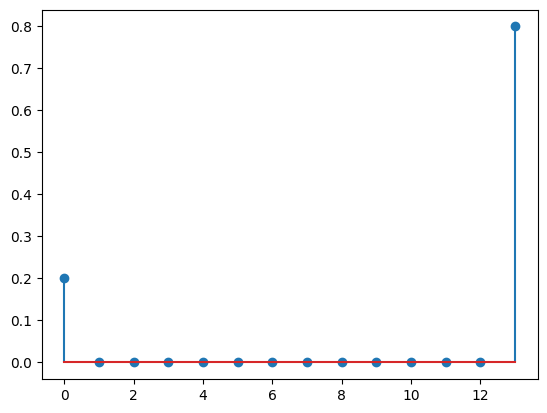

In [4]:
def integer_to_binary_tuple(integer, word_size):
    # Obtener la representación binaria del número entero sin el prefijo '0b'
    binary_str = bin(integer)[2:]

    # Asegurarse de que la cadena binaria tenga el tamaño deseado llenando con ceros a la izquierda si es necesario
    binary_str = binary_str.zfill(word_size)

    # Crear una tupla con cada bit del número binario
    binary_tuple = tuple(int(bit) for bit in binary_str)
    return binary_tuple

print(f"Numero de productos {env.J}")
a = (2**env.J)-1 
a = integer_to_binary_tuple(a, env.J)
print(f"Acción de logitud {len(a)} {a}")
env.P_j_dist_dado_l
if np.random.choice([0,1],p=[1-env.lambd, env.lambd]) == 1:
    cliente = np.random.choice(env.L,p=env.p_l)
    print(f"LLega cliente {cliente}")
    dist = env.P_j_dist_dado_l(a,cliente)
    print(dist[1:])
    plt.stem(dist)
    sample = np.random.choice(len(dist), p=dist)
else:
    print("Cliente no llega")
    sample = 0

print(sample)

In [16]:
import pickle

name_exp = "Exp14"#"Exp12"
Red_name = "hub2"
Demand_Model = "Exp" #Puede ser EXP/MNL
Qfun_model = "NN-PG" #Puede ser LR/NN

with open("results/"+ name_exp +"/" + Demand_Model + "_" + Qfun_model +"_" + Red_name +".pickle", 'rb') as f:
    exp = pickle.load(f)

Qfun = exp["qfun_exp"][0]
R_exp = exp["R_exp"]
time_exp = exp["Time_exp"]

In [17]:
time_exp

[17035.662306308746]

In [6]:
import pickle

name_exp = "Exp15"#"Exp12"
Red_name = "hub2"
Demand_Model = "Exp" #Puede ser EXP/MNL
Qfun_model = "NN-PG" #Puede ser LR/NN

with open("results/"+ name_exp +"/" + Demand_Model + "_" + Qfun_model +"_" + Red_name +".pickle", 'rb') as f:
    exp = pickle.load(f)

Qfun = exp["qfun_exp"][0]
R_exp = exp["R_exp"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


168150


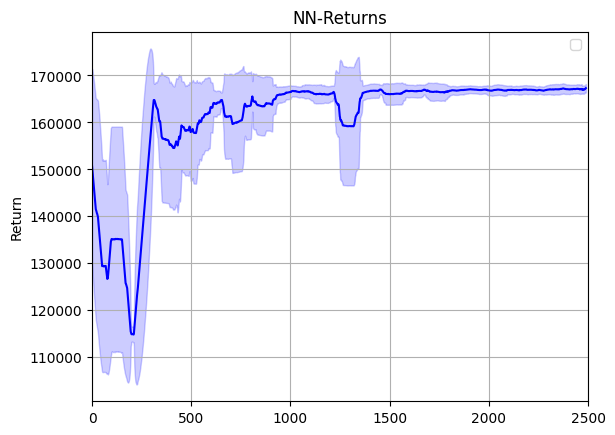

In [14]:
from algorithms.utils import generate_random_colors

colors = generate_random_colors(1)
Rs = np.array(R_exp[0][:2500]).ravel()

mean = np.array([np.mean(Rs[i:i+100]) for i in range(len(Rs) - 10)])
std = np.array([np.std(Rs[i:i+100]) for i in range(len(Rs) - 10)])
time = np.arange(mean.size)
plt.plot(mean,color='b')
#plt.plot(Rsim, color = 'r')
plt.fill_between(time, mean - std, mean + std, color='b', alpha=0.2)

plt.xlim(0, len(Rs))
plt.grid()
plt.ylabel("Return")
plt.legend()
plt.title("NN-Returns")
plt.show()

#plt.savefig("results/"+ name_exp + "/Returns_" + Demand_Model + "_" + Qfun_model +"_" + Red_name +".png")

print(R_exp[0][2500])

In [10]:
Qfun.policy

SoftmaxAgent(
  (actor): PolicyNetwork(
    (layers): ModuleList(
      (0): Linear(in_features=6, out_features=128, bias=True)
      (1): Tanh()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): Tanh()
      (4): Linear(in_features=128, out_features=26, bias=True)
    )
  )
  (critic): ValueNetwork(
    (layers): ModuleList(
      (0): Linear(in_features=6, out_features=128, bias=True)
      (1): Tanh()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): Tanh()
      (4): Linear(in_features=128, out_features=1, bias=True)
    )
  )
)

In [9]:
env = env_hubs2(model="Exp", T=1000)
num_sim = 50
max_steps = env.T

Rs = []
R_t= []
S_sf = []
Num_politicas = 3

for p in range(Num_politicas):
    rs = []
    s_t = []
    r_t = []
    s_sf = []
    for episode in range(num_sim):
        s, _ = env.set_initial(s = [0]*env.I)
        R = 0
        for step in range(max_steps):

            if p == 0:
                a = [1,1,1,1,1,0,0,0,0,0,0,0,0]
            elif p == 1:
                a = [1,1,1,1,1,1,1,1,1,1,1,1,1]
            elif p == 2:
                a = list(np.random.choice([0, 1], size=13))
            elif p == 3:
                a = Qfun.policy.pi(s).sample().cpu()
            
            s_prime, r, done, _, _ = env.step(a)
   
            r_t.append(r)
            s_t.append(s)

            R += r

            if done:
                S = s_prime
                break
                    
        rs.append(R)
        s_sf.append(S)
    S_sf.append(s_sf)
    Rs.append(rs)



[1384.52, 327.3, 679.66]
[96196.0, 81534.0, 81548.0]


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (4).

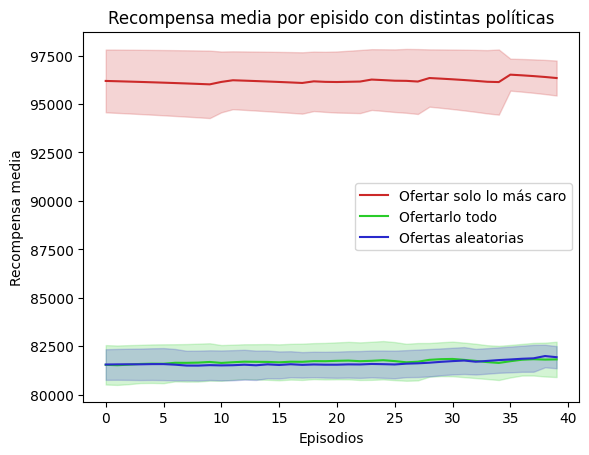

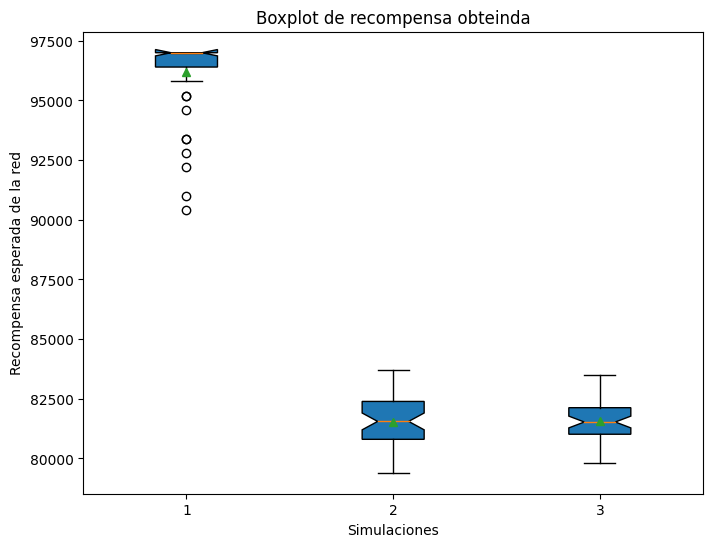

In [8]:
from algorithms.utils import generate_random_colors

colors = generate_random_colors(Num_politicas)
etiqueta =  ["Ofertar solo lo más caro", "Ofertarlo todo", "Ofertas aleatorias","pi"]

for p in range(Num_politicas):
    
    totals = Rs[p]
    x = np.array(totals).ravel()

    mean = np.array([np.mean(x[i:i+100]) for i in range(len(x) - 10)])
    std = np.array([np.std(x[i:i+100]) for i in range(len(x) - 10)])
    time = np.arange(mean.size)
    plt.plot(mean,color=colors[p],label = etiqueta[p])
    #plt.plot(Rsim, color = 'r')
    plt.fill_between(time, mean - std, mean + std, color=colors[p], alpha=0.2)
    plt.title("Recompensa media por episido con distintas políticas")
    plt.xlabel('Episodios')
    plt.ylabel('Recompensa media')
    plt.legend()
    

T_tf_mean = []
for i in range(Num_politicas):
    t_tf = []
    for x in S_sf[i]:
        t_tf.append(x[5])
    T_tf_mean.append(np.mean(t_tf))

print(T_tf_mean)

Rs_f_mean = []
for i in range(Num_politicas):
    Rs_f_mean.append(np.mean(Rs[i]))

print(Rs_f_mean)

datos = Rs
plt.figure(figsize=(8, 6))
plt.boxplot(datos, patch_artist=True, notch=True, showmeans=True)

plt.title('Boxplot de recompensa obteinda')
plt.xlabel('Simulaciones')
plt.ylabel('Recompensa esperada de la red')
plt.xticks(range(1,Num_politicas+1),etiqueta)  # Cambiar etiquetas del eje x
plt.grid(True)

plt.show()


In [40]:
env = env_hubs2(model="Exp", T=1000)
num_sim = 10
max_steps = env.T

Rs = []
R_t= []
S_sf = []

for p in range(4):
    rs = []
    s_t = []
    r_t = []
    s_sf = []
    for episode in range(num_sim):
        s, _ = env.set_initial(s = [0]*env.I)
        R = 0
        for step in range(max_steps):

            if p == 0:
                a = [1,1,1,1,1,0,0,0,0,0,0,0,0]
            elif p == 1:
                a = [1,1,1,1,1,1,1,1,1,1,1,1,1]
            elif p == 2:
                a = [1,1,1,1,1,1,1,1,1,1,1,1,1]
            elif p == 3:
                a = list(np.random.choice([0, 1], size=13))
            
            s_prime, r, done, _, _ = env.step(a)
   
            r_t.append(r)
            s_t.append(s)

            R += r

            if done:
                S = s_prime
                break
                    
        rs.append(R)
        s_sf.append(S)
    S_sf.append(s_sf)
    Rs.append(rs)

T_tf_mean = []
for i in range(3):
    t_tf = []
    for x in S_sf[i]:
        t_tf.append(x[5])
    T_tf_mean.append(np.mean(t_tf))

print(T_tf_mean)

Rs_f_mean = []
for i in range(3):
    Rs_f_mean.append(np.mean(Rs[i]))

print(Rs_f_mean)

[999.0, 660.1, 656.8]
[125140.0, 162110.0, 162815.0]


[1999.0, 682.2, 1199.5]
[168320.0, 163350.0, 163025.0]


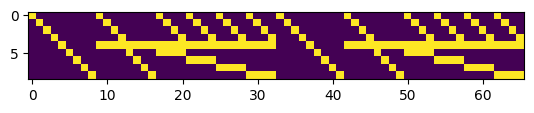

In [2]:
env = env_hubs0(model="Exp", T=2000)
plt.imshow(env.A_ij)

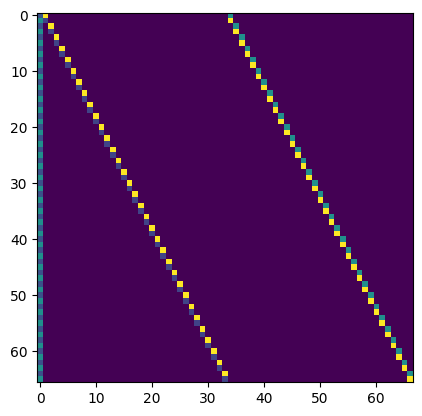

In [3]:

plt.imshow(env.v_lj)

In [9]:
sum(env.p_l)

1.0000000000000013

Numero de productos 66
Acción de logitud 66 (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
LLega cliente 65
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.11764706 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.58823529]
0


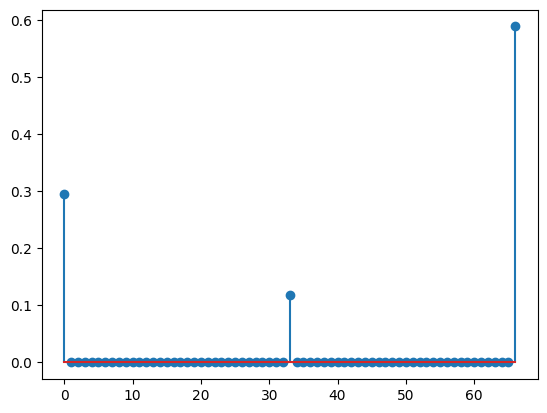

In [8]:
def integer_to_binary_tuple(integer, word_size):
    # Obtener la representación binaria del número entero sin el prefijo '0b'
    binary_str = bin(integer)[2:]

    # Asegurarse de que la cadena binaria tenga el tamaño deseado llenando con ceros a la izquierda si es necesario
    binary_str = binary_str.zfill(word_size)

    # Crear una tupla con cada bit del número binario
    binary_tuple = tuple(int(bit) for bit in binary_str)
    return binary_tuple

print(f"Numero de productos {env.J}")
a = (2**env.J)-1 
a = integer_to_binary_tuple(a, env.J)
print(f"Acción de logitud {len(a)} {a}")
env.P_j_dist_dado_l
if np.random.choice([0,1],p=[1-env.lambd, env.lambd]) == 1:
    cliente = np.random.choice(env.L,p=env.p_l)
    print(f"LLega cliente {cliente}")
    dist = env.P_j_dist_dado_l(a,cliente)
    print(dist[1:])
    plt.stem(dist)
    sample = np.random.choice(len(dist), p=dist)
else:
    print("Cliente no llega")
    sample = 0

print(sample)

In [10]:
class Buffer:
    def __init__(self):
        self.actions = []
        self.states = []
        self.logprobs = []
        self.rewards = []
        self.terminals = []

    def clear(self):
        self.actions = []
        self.states = []
        self.logprobs = []
        self.rewards = []
        self.terminals = []

    def __len__(self):
        return len(self.states)

In [11]:
from typing import Tuple

import numpy as np
import torch
import torch.nn as nn

class SoftmaxAgent(nn.Module):
    def __init__(self, actor, critic, discretizer_actor=None, discretizer_critic=None) -> None:
        super(SoftmaxAgent, self).__init__()

        self.actor = actor
        self.critic = critic

        self.discretizer_actor = discretizer_actor
        self.discretizer_critic = discretizer_critic

    def pi(self, state: np.ndarray) -> torch.distributions.Normal:
        state = torch.as_tensor(state).double()

        # Parameters
        if self.discretizer_actor:
            state = state.numpy().reshape(-1, len(self.discretizer_actor.buckets))
            indices = self.discretizer_actor.get_index(state)
            logits = self.actor(indices).squeeze()
        else:
            logits = self.actor(state).squeeze()

        # Distribution
        pi = torch.distributions.categorical.Categorical(logits=logits)
        return pi

    def evaluate_logprob(self, state: torch.Tensor, action: torch.Tensor) -> torch.Tensor:
        # Actor
        dist = self.pi(state)
        action_logprob = dist.log_prob(action)
        return action_logprob.squeeze()

    def evaluate_value(self, state: torch.Tensor) -> torch.Tensor:
        # Critic
        if self.discretizer_critic:
            state = state.numpy().reshape(-1, len(self.discretizer_actor.buckets))
            indices = self.discretizer_critic.get_index(state)
            value = self.critic(indices)
            return value.squeeze()
        value = self.critic(state)
        return value.squeeze()

    def act(self, state: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        dist = self.pi(state)
        action = dist.sample()
        action_logprob = dist.log_prob(action)
        return action.detach().flatten(), action_logprob.detach().flatten()


In [12]:
from typing import Tuple, List

import numpy as np
import torch


class ReinforceSoftmaxNN:
    def __init__(
            self,
            actor,
            critic,
            discretizer_actor=None,
            discretizer_critic=None,
            gamma=0.99,
            tau=0.97,
            epochs: int=1000,
            lr_actor=1e-2,
        ):
        self.gamma = gamma
        self.tau = tau
        self.epochs = epochs

        self.buffer = Buffer()
        self.policy = SoftmaxAgent(actor, critic, discretizer_actor, discretizer_critic)
        self.opt_actor = torch.optim.Adam(self.policy.actor.parameters(), lr_actor)

        self.opt_critic = torch.optim.LBFGS(
            self.policy.critic.parameters(),
            history_size=100,
            max_iter=25,
            line_search_fn='strong_wolfe',
        )

    def select_action(self, state: np.ndarray) -> np.ndarray:
        with torch.no_grad():
            state = torch.as_tensor(state).double()
            action, action_logprob = self.policy.act(state)

        self.buffer.states.append(state)
        self.buffer.actions.append(action)
        self.buffer.logprobs.append(action_logprob)

        return action.item()

    def calculate_returns(self, values) -> List[float]:
        returns = []
        advantages=[]

        prev_return = 0
        prev_value = 0
        prev_advantage = 0
        for i in reversed(range(len(self.buffer.rewards))):
            reward = self.buffer.rewards[i]
            mask = 1 - self.buffer.terminals[i]

            actual_return = reward + self.gamma*prev_return*mask
            actual_delta = reward + self.gamma*prev_value*mask - values[i]
            actual_advantage = actual_delta + self.gamma*self.tau*prev_advantage*mask        

            returns.insert(0, actual_return)
            advantages.insert(0, actual_advantage)

            prev_return = actual_return
            prev_value = values[i]
            prev_advantage = actual_advantage

        returns = torch.as_tensor(returns).double().detach().squeeze()
        advantages = torch.as_tensor(advantages).double().detach().squeeze()
        advantages = (advantages - advantages.mean())/advantages.std()

        return returns, advantages

    def zero_grad(self, model, idx=None):
        if idx is None:
            return

        for i, param in enumerate(model.parameters()):
            if i != idx:
                param.grad.zero_()

    def update_critic(self, idx=None):
        states = torch.stack(self.buffer.states, dim=0).detach()

        # GAE estimation
        values = self.policy.evaluate_value(states)
        rewards, advantages = self.calculate_returns(values.data.numpy())

        # LBFGS training
        def closure():
            self.opt_critic.zero_grad()
            values = self.policy.evaluate_value(states)
            loss = (values - rewards).pow(2).mean()
            loss.backward()
            self.zero_grad(self.policy.critic, idx)
            return loss
        self.opt_critic.step(closure)

        return advantages

    def update_actor(self, advantages, idx=None):
        states = torch.stack(self.buffer.states, dim=0).detach()
        actions = torch.stack(self.buffer.actions, dim=0).detach().squeeze()

        # Stochastic Gradient Ascent
        for _ in range(self.epochs):
            logprobs = self.policy.evaluate_logprob(states, actions)
            loss_actor = -logprobs*advantages
            self.opt_actor.zero_grad()
            loss_actor.mean().backward()
            self.zero_grad(self.policy.actor, idx)
            self.opt_actor.step()

In [13]:
from typing import Tuple


class Trainer:
    def __init__(self, actor_opt, critic_opt):
        self.actor_opt = actor_opt
        self.critic_opt = critic_opt

    def _update(self, agent):
        if self.actor_opt == 'bcd':
            n_params_critic = len(list(agent.policy.critic.parameters()))
            for i in range(n_params_critic):
                advantages = agent.update_critic(i)
        else:
            advantages = agent.update_critic()

        if self.critic_opt == 'bcd':
            n_params_actor = len(list(agent.policy.actor.parameters()))
            for i in range(n_params_actor):
                agent.update_actor(advantages, i)
        else:
            agent.update_actor(advantages)

        agent.buffer.clear()

    def train(
        self,
        env,
        agent,
        epochs: int,
        max_steps: int,
        update_freq: int,
        initial_offset: int,
    ):
        returns = []
        timesteps = []
        favorable_routes = 0
        self.high_reward_states = []
        for epoch in range(epochs):
            state, _ = env.reset()
            cum_reward = 0

            for t in range(max_steps):
                action = agent.select_action(state)
                state_next, reward, done, _, _ = env.step(action)


                if t + 1 == max_steps:
                    done = True

                agent.buffer.rewards.append(reward)
                agent.buffer.terminals.append(done)
                cum_reward += reward

                if len(agent.buffer) >= update_freq and epoch > initial_offset:
                    self._update(agent)

                if done:
                    break

                state = state_next
            returns.append(cum_reward)
            timesteps.append(t)
            print(f'{epoch}/{epochs}: {returns[-1]}, Num. High rewuards \r', end='')
        return agent, returns, timesteps

In [14]:

class PolicyPARAFAC(torch.nn.Module):
    def __init__(self, dims, k, scale=1.0, model='gaussian'):
        super().__init__()

        self.k = k
        self.n_factors = len(dims)

        factors = []
        for dim in dims:
            factor = scale*torch.randn(dim, k, dtype=torch.double, requires_grad=True)
            factors.append(torch.nn.Parameter(factor))
        self.factors = torch.nn.ParameterList(factors)

        self.model = model
        if model == 'gaussian':
            self.log_sigma = torch.nn.Parameter(torch.zeros(1))

    def forward(self, indices):
        indices = indices.long()
        if len(indices.shape) == 1:
            indices = indices.view(1, -1)
        bsz = indices.shape[0]
        prod = torch.ones(bsz, self.k, dtype=torch.double)
        for i in range(indices.shape[1]):
            idx = indices[:, i]
            factor = self.factors[i]
            prod *= factor[idx, :]
        if indices.shape[1] < len(self.factors):
            res = torch.matmul(prod, self.factors[-1].T)
        else:
            res = torch.sum(prod, dim=-1)
        if self.model == 'gaussian':
            return res, torch.clamp(self.log_sigma, min=-2.5, max=0.0)
        return res


class ValuePARAFAC(torch.nn.Module):
    def __init__(self, dims, k, scale=1.0):
        super().__init__()

        self.k = k
        self.n_factors = len(dims)

        factors = []
        for dim in dims:
            factor = scale*torch.randn(dim, k, dtype=torch.double, requires_grad=True)
            factors.append(torch.nn.Parameter(factor))
        self.factors = torch.nn.ParameterList(factors)

    def forward(self, indices):
        indices = indices.long()
        bsz = indices.shape[0]
        prod = torch.ones(bsz, self.k, dtype=torch.double)
        for i in range(indices.shape[1]):
            idx = indices[:, i]
            factor = self.factors[i]
            prod *= factor[idx, :]
        if indices.shape[1] < len(self.factors):
            return torch.matmul(prod, self.factors[-1].T)
        return torch.sum(prod, dim=-1)


In [16]:
env = env_hubs0(model="Exp", T=2000)

dimensions_actor = list(env.C + 1)
dimensions_actor.append(env.T+1)

dimensions_actor.extend([3]*33)


dimensions_critic = list(env.C + 1)
dimensions_critic.append(env.T+1)

freq = 5000

lr_actor = 1e-3

k = 5




In [17]:
Trainer = Trainer("sgd", "sgd")

In [18]:
actor = PolicyPARAFAC(dimensions_actor, k=k, model= "SoftMax", scale = 1)
critc = ValuePARAFAC(dimensions_critic, k=k, scale = 1)



agent = ReinforceSoftmaxNN(actor, critc,discretizer_actor=None,discretizer_critic=None, gamma=1, tau=1, lr_actor=lr_actor)

In [30]:
s, _ =env.reset()
agent.policy.act(s)

(tensor([2]), tensor([-1.1035], dtype=torch.float64))

In [ ]:
agent , totals,_ = Trainer.train(env, agent, epochs=7000, max_steps=300, update_freq=freq, initial_offset=0)

Rs = totals
mean = np.array([np.mean(Rs[i:i+100]) for i in range(len(Rs) - 10)])
std = np.array([np.std(Rs[i:i+100]) for i in range(len(Rs) - 10)])
time = np.arange(mean.size)
plt.plot(mean,color='b',label= "Exp")
plt.fill_between(time, mean - std, mean + std, color='b', alpha=0.2)
plt.grid()
plt.show()

In [9]:
import time
num_sim = 1000
max_steps = env.T

Rs = []
r_t= []
s_t = []
a_t = []

for episode in range(num_sim):
    s, _ = env.set_initial(s = [0]*env.I)
    R = 0
    for step in range(max_steps):

        a = 2**(env.J) - 1
        start_time = time.time()
        s_prime, r, done, _, _ = env.step(a)
        end_time = time.time()
        print(end_time-start_time)    
        r_t.append(r)
        s_t.append(s)
        a_t.append(a) 

        R += r

        if done:
            break
                
        s = s_prime
    print(s)
    Rs.append(R)

0.00171661376953125
0.0004417896270751953
0.0003135204315185547
0.00031828880310058594
0.00031065940856933594
0.0003113746643066406
0.0002994537353515625
0.00030803680419921875
0.00030231475830078125
0.0002999305725097656
0.0003151893615722656
0.00030732154846191406
0.0003032684326171875
0.00031280517578125
0.00030303001403808594
0.0003006458282470703
0.00030112266540527344
0.0003001689910888672
0.000301361083984375
0.0002944469451904297
0.00029969215393066406
0.0002970695495605469
0.0002980232238769531
0.0003261566162109375
0.0002987384796142578
0.0002949237823486328
0.0003006458282470703
0.00030040740966796875
0.0002987384796142578
0.00029850006103515625
0.00030112266540527344
0.00031113624572753906
0.00031065940856933594
0.00037407875061035156
0.0003104209899902344
0.0003039836883544922
0.0003151893615722656
0.00030517578125
0.0003018379211425781
0.0003006458282470703
0.0002963542938232422
0.0002923011779785156
0.0003006458282470703
0.0003008842468261719
0.00029969215393066406
0.000

KeyboardInterrupt: 

In [ ]:
env.action_space[0]

In [ ]:


print(action_space_generation(3, 2))

In [ ]:
def action_space_generation(J,ini_num_actions):
    return random.sample(list(product([0,1], repeat=J)), ini_num_actions)

print(action_space_generation(10, 2))

In [ ]:
carpeta = "results/Exp5"
Demand_Model = "Exp"
Red_name = "red1"

In [ ]:
T = 400
env = env_red_toy1(Demand_Model,T)
# DQL
Qfun_model = "NN"
with open(carpeta +"/" + Demand_Model + "_" + Qfun_model +"_" + Red_name +".pickle", 'rb') as f:
    data = pickle.load(f)

qnet_exp = data["qfun_exp"]

#LRQL
Qfun_model = "LR"
with open(carpeta +"/" + Demand_Model + "_" + Qfun_model +"_" + Red_name +".pickle", 'rb') as f:
    data = pickle.load(f)
    
qtensor_exp = data["qfun_exp"]

In [ ]:
num_sim = 1000
max_steps = 400
Qfun = qtensor_exp[0]
model = "LR"

Rs = []
r_t= []
s_t = []
a_t = []

for episode in range(num_sim):
    s, _ = env.set_initial(s = [0]*env.I)
    R = 0
    for step in range(max_steps):

        if model == "NN":
            a = select_action(Qfun, s, 0, 2**(env.J))
        if model == "LR":
            a = select_action_LR(Qfun, s, 0,  2**(env.J))

        s_prime, r, done, _, _ = env.step(a)
            
        r_t.append(r)
        s_t.append(s)
        a_t.append(a) 

        R += r

        if done:
            break
                
        s = s_prime
    Rs.append(R)

In [ ]:
def compare_Qfun(env, Qfun1, Qfun2, model1, model2):

    s_vecors = [range(0,c) for c in env.C]
    s_vecors.append(range(env.T-1))
    dif = 0  # Inicializar el máximo como negativo infinito
    
    for s_i in (product(*s_vecors)):

        s = torch.tensor(s_i, dtype=torch.double)

        if model1 == "NN":
            val1 = torch.max(Qfun1(s)).item()
        elif model1 == "LR":
            val1 = torch.max(Qfun1(torch.tensor(s_i, dtype=torch.long).view(1, -1))).item()

        if model2 == "NN":
            val2 = torch.max(Qfun2(s)).item()
        elif model2 == "LR":
            val2 = torch.max(Qfun2(torch.tensor(s_i, dtype=torch.long).view(1, -1))).item()

        dif += abs(val1-val2)

    return dif

In [ ]:
def compare_Qfun_exp(env,Qfun_list, model,name):
    data = np.zeros((len(Qfun_list), len(Qfun_list)))
    for q1 in range(len(Qfun_list)):
        for q2 in range(q1+1,len(Qfun_list)):
            diff = compare_Qfun(env, Qfun_list[q1], Qfun_list[q2], model, model)
            data[q1, q2] = diff
            data[q2, q1] = diff
    plt.imshow(np.array(data))
    plt.title("Diferencia en las funciones de valor")
    plt.xlabel("Exp1")
    plt.ylabel("Exp2")
    plt.colorbar()
    plt.savefig(name)

In [ ]:
compare_Qfun_exp(env,qnet_exp,"NN","Prueba")

In [ ]:
print(diff_matrix)

In [ ]:
plt.imshow(np.array(diff_matrix))
plt.title("Diferencia en las funciones de valor")
plt.xlabel("Exp1")
plt.ylabel("Exp2")
plt.colorbar()


In [ ]:
# DQL
env = env_red_toy()

nS = env.I + 1
nA =  2**(env.J)
nH = 128

qnet = torch.nn.Sequential(
    torch.nn.Linear(nS, nH),
    torch.nn.ReLU(),
    torch.nn.Linear(nH, nH),
    torch.nn.ReLU(),
    torch.nn.Linear(nH, nH),
    torch.nn.ReLU(),
    torch.nn.Linear(nH, nA)
).double()

qnet.load_state_dict(torch.load("results/qnet_toy.pth"))

In [ ]:
def get_toy_slide(qnet, t, states_map,C_1,C_2):
    t = 0
    data = np.zeros((len(C_1),len(C_2)))
    for (x1,x2) in (list(product(C_1,C_2))):
        idx = states_map[(x1,x2,t)]
        s = torch.tensor([x1,x2, t], dtype=torch.double)
        data[x1,x2] = torch.max(qnet(s))
    return data

In [ ]:
C_1 = range(0,env.C[0])
C_2 = range(0,env.C[1])
T_RANGE = range(0,env.T)

states_map = {}

for idx, (x1,x2, t) in enumerate(list(product(C_1,C_2,T_RANGE))):
            states_map[(x1,x2, t)] = idx

vmax = torch.max(qnet(torch.tensor([0,0, 0], dtype=torch.double)))

data = get_toy_slide(qnet, t, states_map,C_1,C_2)

plt.imshow(data, cmap='inferno', interpolation='nearest',vmin=0, vmax=vmax)
    
plt.colorbar()  # Agregar barra de colores para referencia
plt.title(f'V(s)-DQL_toy ,t =  {t}')
plt.xlabel('Asientos vendidos, x2')
plt.ylabel('Asientos vendidos, x1')


In [ ]:
def get_tensor_from_net(qnet,env):
    dimensiones = [c for c in env.C]
    dimensiones.append(env.T)
    #dimensiones.append(len(env.action_space))

    tensor = torch.zeros(dimensiones)
    # Genera las combinaciones de índices usando itertools.product
    combinaciones = product(*(range(valor) for valor in dimensiones))

    # Itera sobre las combinaciones
    for combinacion in combinaciones:
        #tensor[combinacion] = qnet(torch.tensor(combinacion[:-1],dtype=torch.double))[combinacion[-1]]
        tensor[combinacion] = torch.max(qnet(torch.tensor(combinacion,dtype=torch.double)))
    return tensor

tensor = get_tensor_from_net(qnet,env)



In [ ]:
rank = tf.rank(tensor.detach().numpy())
print(rank)

k = 5
# Realizar la descomposición PARAFAC
CPTensor, err = tl.decomposition.parafac(tensor.detach().numpy(),rank=k, return_errors = True)

factors = []
for factor in CPTensor.factors:
    factors.append(torch.tensor(factor))

plt.plot(err)
plt.grid()
plt.title("Error of parafact over the approx")
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()


In [ ]:
def tensor_forward(factors,k,indices):
    bsz = indices.shape[0]
    prod = torch.ones(bsz, k, dtype=torch.double)
    for i in range(indices.shape[1]):
        idx = indices[:, i]
        factor = factors[i]
        prod *= factor[idx, :]
    if indices.shape[1] < len(factors):
        return torch.matmul(prod, factors[-1].T)
    return torch.sum(prod, dim=-1)




In [ ]:
# Función para generar datos de la imagen
def generate_data(frame):
    t = frame
    data = np.zeros((len(C_1),len(C_2)))
    for (x1,x2) in (list(product(C_1,C_2))):
        s = torch.tensor([x1,x2, t], dtype=torch.long).view(1, -1)
        data[x1,x2] =tensor_forward(factors,k,s)
    return data

# Función para la animación
def animate(frame):
    plt.clf()  # Limpiar el gráfico en cada frame
    data = generate_data(frame)
    plt.imshow(data, cmap='inferno', interpolation='nearest')
    
    plt.colorbar()  # Agregar barra de colores para referencia
    plt.title(f'V(s)-DQL_toy ,Frame {frame}')
    plt.xlabel('Asientos vendidos, x2')
    plt.ylabel('Asientos vendidos, x1')
    

# Crear la figura
fig, ax = plt.subplots()

# Crear la animación
animation = FuncAnimation(fig, animate, frames=50, interval=200)

# Guardar la animación en un archivo GIF
animation.save('DQL-to_tensor-reconstruida.gif', writer='imagemagick', fps=5)

# Mostrar el gráfico
plt.show()